# Imbalanced Dataset

- Eg of Imbalanced Dataset:
    - Out of total 1000 records, 900 'Yes' and 100 'No'
    - A dumb model trained on this --> 90% accuracy (as it will always o/p 'Yes')
    
- To handle this:
  - Upsampling (increase the data with less ratio)
  - Downsampling (reduce the data with more ratio)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two calsses
n_samples = 1000
n_class_0 = 0.9
n_class_0 = int(n_samples * n_class_0)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0, n_class_1

(900, 100)

In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1]*n_class_1
})

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [ ]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

## Upsampling

In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
df_minority.head()

,feature_1,feature_2,target
900,-0.300232,0.139033,1
901,-0.632261,0.025577,1
902,-0.204317,-0.196443,1
903,0.213696,1.312255,1
904,1.033878,1.187417,1


In [ ]:
df_majority.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
# Perform Upsampling
from sklearn.utils import resample

In [ ]:
df_minority_upsample = resample(df_minority,
                                replace=True, # Sample with replacement
                                n_samples=len(df_majority),
                                random_state=42) # To match the no. of samples of the majority class

In [ ]:
df_minority_upsample.shape

(900, 3)

In [ ]:
df_minority_upsample.head()

,feature_1,feature_2,target
951,-0.874146,-0.156083,1
992,0.196570,-0.602575,1
914,-0.067830,0.998053,1
971,0.272825,1.034197,1
960,0.870056,-0.449515,1


In [ ]:
df_minority_upsample.value_counts()

feature_1  feature_2  target
-0.994810  -0.889911  1         19
-0.084530  -0.347959  1         18
 1.701608   0.160889  1         18
 0.902006  -1.609695  1         16
 1.013493   0.047240  1         16
                                ..
 0.549697   1.095922  1          4
 0.013560   0.847260  1          4
 0.995595   0.475934  1          4
-1.011644  -0.164875  1          4
-0.754008   0.946908  1          3
Length: 100, dtype: int64

In [ ]:
df_minority_upsample['target'].value_counts()

1    900
Name: target, dtype: int64

In [ ]:
df_upsample = pd.concat([df_majority, df_minority_upsample])

In [ ]:
df_upsample['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

In [ ]:
df_upsample.shape

(1800, 3)

## Downsampling

In [ ]:
# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two calsses
n_samples = 1000
n_class_0 = 0.9
n_class_0 = int(n_samples * n_class_0)
n_class_1 = n_samples - n_class_0

In [ ]:
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0]*n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_1),
    'target': [1]*n_class_1
})

In [ ]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [ ]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
df_majority_downsample = resample(df_majority,
                                replace=False, # Sample without replacement
                                n_samples=len(df_minority),
                                random_state=42) # To match the no. of samples of the minority class

In [ ]:
df_majority_downsample.shape

(100, 3)

In [ ]:
df_downsample = pd.concat([df_minority, df_majority_downsample])

In [ ]:
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

In [ ]:
df_downsample

,feature_1,feature_2,target
900,-0.300232,0.139033,1
901,-0.632261,0.025577,1
902,-0.204317,-0.196443,1
903,0.213696,1.312255,1
904,1.033878,1.187417,1
...,...,...,...
398,-0.168426,0.553775,0
76,-0.403366,0.081491,0
196,-0.269293,0.611238,0
631,-0.295829,0.671673,0


# SMOTE (Synthetic Minority Oversampling Technique)

SMOTE (Synthetic Minority Oversampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.


In [ ]:
from sklearn.datasets import make_classification
import pandas as pd

In [ ]:
# X is Independent Feature
# y is Dependent Feature
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.90], random_state=1)

In [ ]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1) # Concatenate Dataframes Column Wise

In [ ]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [ ]:
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

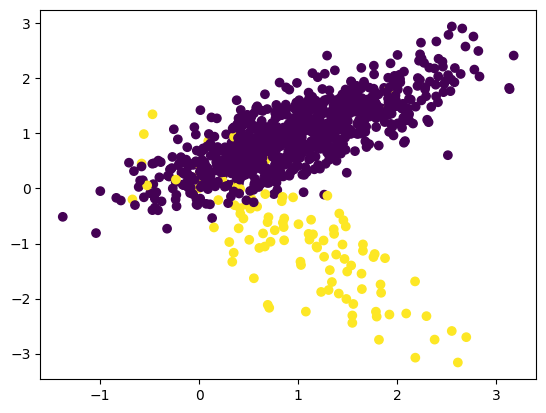

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])
plt.show()

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [ ]:
X.shape

(1788, 2)

In [ ]:
y.shape

(1788,)

In [ ]:
len(y[y==0])

894

In [ ]:
len(y[y==1])

894

In [ ]:
y.value_counts()

1    894
0    894
Name: target, dtype: int64

In [ ]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversample_df = pd.concat([df1, df2], axis=1) # Concatenate Dataframes Column Wise

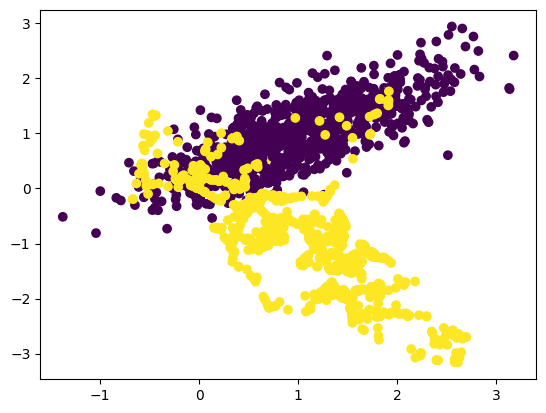

In [ ]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c=oversample_df['target'])